### Problem Staement
---
##### You work for a consumer finance company which specialises in lending various types of loans to urban customers. When the company receives a loan application, the company has to make a decision for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:

>-  If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company
>-  If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company

The data given below contains information about past loan applicants and whether they ‘defaulted’ or not. The aim is to identify patterns which indicate if a person is likely to default, which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc.

### Import libraries

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings

In [271]:
# List down the version of each libraries
print(pd.__version__)
print(np.__version__)
print(sns.__version__)

2.0.3
1.24.3
0.12.2


In [2]:
#ignore warnings in cell output
warnings.filterwarnings('ignore')

## Data sourcing : Load Loan Data set into the notebook

In [3]:

loan = pd.read_csv('loan.csv')
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


## Basic data volume analysis

In [4]:
print(loan.ndim)
print(loan.shape)
print(loan.info())
print(loan.columns)

2
(39717, 111)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB
None
Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)


# Start Data Clean up - Null treatment
## This covers
    ### Duplicate rows
    ### Rows with Null values
    ### Columns with all null values
    ### Columns with high percentage of null values
    ### Rows with high percentage of null variables
    

In [5]:
# Duplicate row - Check is performed on member_id col
loan[loan.duplicated(subset=['member_id']) == 'true']
# No rows turned out to be duplicate and thus no dropping of rows are required

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit


In [6]:
# Empty rows handling - where all the col values are null
loan.dropna(axis=0,how='all',inplace=True)
len(loan)
# We found that none of the rows are there in the data set where all variable values are Null

39717

In [7]:
# Columns with all null values . These cols are of no use.
loan.dropna(axis=1,how='all',inplace=True)
len(loan.columns)
# So we have now reduced the number of cols from 111 to 57 as the (111-57 = 54) no of cols turned out to have nothing but Null values.

57

### Columns with high percentage of null values. Here we do not like to consider the columns where 50% or more data are empty. A col with more than 50% empty data can not be of much use and lead to a not so trustworthy result if the 50% or more null values are imputed from statistical analysis of 50% or less data.


In [8]:
loan.isna().sum() 

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                      2459
emp_length                     1075
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
desc                          12942
purpose                           0
title                            11
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths              

### Below we write a short function to delete all cols where more than 50% of data is empty. We do not prefer to hardcode the columns here.

In [9]:
def additionalcolsToDrop():
    additional_colsToDrop=[]
    for i in loan.columns:
        if loan[i].isna().sum() > loan.shape[0] *.5:
            additional_colsToDrop.append(i)
    loan.drop(labels=additional_colsToDrop,axis=1,inplace=True)
 

additionalcolsToDrop()

In [10]:
# Now the number of col comes down to 54 means 3 more cols were deleted in the last step (50% or more data are empty in col)
loan.shape

(39717, 54)

### We would like to further check if there are rows with mostly empty data. Such records are not going to be pretty useful for us.We consider 30 as the threshold value and if any row that does not have atleast 30 non-NA values will be dropped.


In [11]:
# We find that no row gets dropped as none of the records meet our criteria of dropping NA rows

loan.dropna(thresh=30,axis=0,inplace=True)
loan.shape


(39717, 54)

# Data Clean up - Extended
## This covers
        ### Data type handling
        ### Analysis of non critical columns for our purpose
        ### Derived data (if required)

In [12]:
loan.info()
# For the ease of data checking from excel we create a new csv file after dropping the empty columns
loan.to_csv('loan_cleaned.csv')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 54 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

## Data Type Handling, for now we will handle the below columns and will take the necessary actions to set the Target Data Type

| Column Name| Exiusting Data Type | Target Data Type |
|:--------:|:--------:|:--------:|
|  term   |  object  |  Int   |
|  int_rate    |  object   |  Float  |
|  emp_length    |  object   |  Int  |
|  issue_d    |  object   |  DateTime  |
|  earliest_cr_line    |  object   |  DateTime  |
|  revol_util    |  object   |  Float  |
|  last_pymnt_d    |  object   |  DateTime  |
|  last_credit_pull_d | object  | DateTime |


In [13]:
# Column term
# Convert Term to Int data type. For that we need to remove the word months

loan['term'] = loan['term'].apply(lambda x : int(x[:3]))

In [14]:
# Column int_rate
# Convert int_rate to float. For that we need to remove the % sign
loan['int_rate'] = loan['int_rate'].apply(lambda x : x.replace('%','').strip())

In [15]:
# Now convert to float data type. This could have done in the last step but we missed to do it.
loan['int_rate'] = loan['int_rate'].astype('float')

In [16]:
# Col emp_length
# Convert emp_length to int. For that we have to remove  characters like >,<,+ and the term years.
# We use filter in conjuction with isdigit to do this

loan['emp_length'] = loan['emp_length'].apply(lambda x : ("".join(filter(str.isdigit, str(x)))))


In [17]:
loan['emp_length'].value_counts()


emp_length
10    8879
1     7823
2     4388
3     4095
4     3436
5     3282
6     2229
7     1773
8     1479
9     1258
      1075
Name: count, dtype: int64

In [18]:
# We see 1075 records with no employment record, we can get rid of those items
loan = loan[   loan['emp_length']!='']

In [19]:
# Now convert emp_length  to int
loan['emp_length'] = loan['emp_length'].astype(int)
loan.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38642 entries, 0 to 39716
Data columns (total 54 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          38642 non-null  int64  
 1   member_id                   38642 non-null  int64  
 2   loan_amnt                   38642 non-null  int64  
 3   funded_amnt                 38642 non-null  int64  
 4   funded_amnt_inv             38642 non-null  float64
 5   term                        38642 non-null  int64  
 6   int_rate                    38642 non-null  float64
 7   installment                 38642 non-null  float64
 8   grade                       38642 non-null  object 
 9   sub_grade                   38642 non-null  object 
 10  emp_title                   37202 non-null  object 
 11  emp_length                  38642 non-null  int32  
 12  home_ownership              38642 non-null  object 
 13  annual_inc                  38642 no

In [20]:
# Column issue_d 
# Convert it to Date

loan['issue_d'] = pd.to_datetime(loan['issue_d'], format='%b-%y')


In [21]:
# Column earliest_cr_line
# Convert it to date

loan['earliest_cr_line'] = pd.to_datetime(loan['earliest_cr_line'],format='%b-%y')
loan.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38642 entries, 0 to 39716
Data columns (total 54 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   id                          38642 non-null  int64         
 1   member_id                   38642 non-null  int64         
 2   loan_amnt                   38642 non-null  int64         
 3   funded_amnt                 38642 non-null  int64         
 4   funded_amnt_inv             38642 non-null  float64       
 5   term                        38642 non-null  int64         
 6   int_rate                    38642 non-null  float64       
 7   installment                 38642 non-null  float64       
 8   grade                       38642 non-null  object        
 9   sub_grade                   38642 non-null  object        
 10  emp_title                   37202 non-null  object        
 11  emp_length                  38642 non-null  int32         


In [22]:
# Column revol_util
# Convert it to Float, for that we need to get rid of the % sign at the end
# As we did before we can perform stripping to get rid of the last character
loan['revol_util'] =  loan[ 'revol_util'].apply(lambda x : str(x).rstrip('%'))

loan.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38642 entries, 0 to 39716
Data columns (total 54 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   id                          38642 non-null  int64         
 1   member_id                   38642 non-null  int64         
 2   loan_amnt                   38642 non-null  int64         
 3   funded_amnt                 38642 non-null  int64         
 4   funded_amnt_inv             38642 non-null  float64       
 5   term                        38642 non-null  int64         
 6   int_rate                    38642 non-null  float64       
 7   installment                 38642 non-null  float64       
 8   grade                       38642 non-null  object        
 9   sub_grade                   38642 non-null  object        
 10  emp_title                   37202 non-null  object        
 11  emp_length                  38642 non-null  int32         


In [23]:
# As the % sign is removed now we convert it to 
loan['revol_util'] = loan['revol_util'].astype('float')
loan['revol_util'].value_counts()


revol_util
0.00     941
0.20      62
63.00     61
66.70     57
40.70     57
        ... 
0.83       1
47.36      1
24.65      1
10.61      1
7.28       1
Name: count, Length: 1087, dtype: int64

In [24]:
# Column last_pymnt_d
# Convert it to date
loan['last_pymnt_d'] = pd.to_datetime(loan['last_pymnt_d'], format='%b-%y')
loan.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38642 entries, 0 to 39716
Data columns (total 54 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   id                          38642 non-null  int64         
 1   member_id                   38642 non-null  int64         
 2   loan_amnt                   38642 non-null  int64         
 3   funded_amnt                 38642 non-null  int64         
 4   funded_amnt_inv             38642 non-null  float64       
 5   term                        38642 non-null  int64         
 6   int_rate                    38642 non-null  float64       
 7   installment                 38642 non-null  float64       
 8   grade                       38642 non-null  object        
 9   sub_grade                   38642 non-null  object        
 10  emp_title                   37202 non-null  object        
 11  emp_length                  38642 non-null  int32         


In [25]:
# Column last_credit_pull_d
# Convert it to date

loan['last_credit_pull_d'] = pd.to_datetime(loan['last_credit_pull_d'],format='%b-%y')
loan.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38642 entries, 0 to 39716
Data columns (total 54 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   id                          38642 non-null  int64         
 1   member_id                   38642 non-null  int64         
 2   loan_amnt                   38642 non-null  int64         
 3   funded_amnt                 38642 non-null  int64         
 4   funded_amnt_inv             38642 non-null  float64       
 5   term                        38642 non-null  int64         
 6   int_rate                    38642 non-null  float64       
 7   installment                 38642 non-null  float64       
 8   grade                       38642 non-null  object        
 9   sub_grade                   38642 non-null  object        
 10  emp_title                   37202 non-null  object        
 11  emp_length                  38642 non-null  int32         


## Now that data type conversion is completed for the specified fields we would like to further investigate on the other columns.This investigation is still part of data cleaning part and can cover below steps. Here we need to apply buysiness understanding and domain knowledge
>1. Remove columns which aparently can not add any value to our purpose (e.g borrower's personal information like address...)
>2. derived data (especially for the date time fields)
>3. Columns with no variation of data (unioque data count is 1)

In [26]:
# We can straight away drop 2 columns - url and desc. They are descriptive information and add no values
loan.drop(labels=['url','desc'],axis=1,inplace=True)
loan.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38642 entries, 0 to 39716
Data columns (total 52 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   id                          38642 non-null  int64         
 1   member_id                   38642 non-null  int64         
 2   loan_amnt                   38642 non-null  int64         
 3   funded_amnt                 38642 non-null  int64         
 4   funded_amnt_inv             38642 non-null  float64       
 5   term                        38642 non-null  int64         
 6   int_rate                    38642 non-null  float64       
 7   installment                 38642 non-null  float64       
 8   grade                       38642 non-null  object        
 9   sub_grade                   38642 non-null  object        
 10  emp_title                   37202 non-null  object        
 11  emp_length                  38642 non-null  int32         


### Column removal . They are being removed in the virtue of borrower's personal information having no impact on our analysis.<br> 
>- emp_title
>- policy_code
>- title 



In [27]:
# Column removal - emp_title,zip_code,addr_state,policy_code,title
# They are removed as they either depicts borrower's personal information  or information about product that are insignificant to this analysis
loan.drop(labels=['emp_title','policy_code','title'],axis=1,inplace=True)
loan.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38642 entries, 0 to 39716
Data columns (total 49 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   id                          38642 non-null  int64         
 1   member_id                   38642 non-null  int64         
 2   loan_amnt                   38642 non-null  int64         
 3   funded_amnt                 38642 non-null  int64         
 4   funded_amnt_inv             38642 non-null  float64       
 5   term                        38642 non-null  int64         
 6   int_rate                    38642 non-null  float64       
 7   installment                 38642 non-null  float64       
 8   grade                       38642 non-null  object        
 9   sub_grade                   38642 non-null  object        
 10  emp_length                  38642 non-null  int32         
 11  home_ownership              38642 non-null  object        


### Column removal . They are being removed in the virtue of no variation in data and hence no impact on our analysis.<br> 
>- initial_list_status
>- pymnt_plan
>- pub_rec_bankruptcies
>- delinq_amnt
>- tax_liens
>- chargeoff_within_12_mths 
>- acc_now_delinq 
>- application_type
>- collections_12_mths_ex_med
>- installment

In [28]:
# Column removal 
# initial_list_status - The information about the listing status or approval status is not concerning for our analysis
# pymnt_plan - The col has only value as 'n', such information is not helpful here
# tax_liens - The number of tax liens refers to the total count of legal claims against a person's property or assets due to unpaid taxes. we will not consider this value for 2 reasons
    # 1. Data reason - avalibale value in our data set is only '0' 
    # 2. Business reason - Tax liens is a consequence of defaulter, can not be an attribute to find defaulter
# pub_rec_bankruptcies - Will not consider this again a bankrupcy indicator is not eligble for loan at all.    
# delinq_amnt - delinquent Amount can be critical had there been a wide array of data, our data set contains only one value as '0'
# chargeoff_within_12_mths - We will drop this as this one also a single valued column
# acc_now_delinq - We will drop this as this one also a single valued column
# application_type - In our data set all application types are INDIVIDUAL, we will drop for it's virtue of single valued column
# collections_12_mths_ex_med - We will drop this as this one also a single valued column
# installment - Installment can not be used as a predictor on loan status. Installment is a consequence of loan approaval.

loan.drop(labels=['initial_list_status','pymnt_plan','tax_liens','pub_rec_bankruptcies','delinq_amnt','chargeoff_within_12_mths','acc_now_delinq',
'application_type','collections_12_mths_ex_med','installment'
],axis=1,inplace=True)
loan.info()


<class 'pandas.core.frame.DataFrame'>
Index: 38642 entries, 0 to 39716
Data columns (total 39 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   id                       38642 non-null  int64         
 1   member_id                38642 non-null  int64         
 2   loan_amnt                38642 non-null  int64         
 3   funded_amnt              38642 non-null  int64         
 4   funded_amnt_inv          38642 non-null  float64       
 5   term                     38642 non-null  int64         
 6   int_rate                 38642 non-null  float64       
 7   grade                    38642 non-null  object        
 8   sub_grade                38642 non-null  object        
 9   emp_length               38642 non-null  int32         
 10  home_ownership           38642 non-null  object        
 11  annual_inc               38642 non-null  float64       
 12  verification_status      38642 non-nu

#### Row removal<br>
##### We can get rid of the Current loans as they are not going to influence our decison. Our focus will be the ChargedOff and Fully paid loans

In [29]:
loan = loan[ ~ (loan['loan_status'] == 'Current') ]
loan.shape

(37544, 39)

In [30]:
# Since more than 1000 records are deleted we would like to reset the index
loan.reset_index(inplace=True,drop=True)

# Univariate Analysis - Continious variables
## Start Univariate Analysis for the continious variables
#### We would like to check the distribution, variance and outliers of some of the critical continious variables.
>1. loan_amnt
>1. int_rate
>1. emp_length
>1. annual_inc
>1. dti
>1. revol_bal
>1. revol_util


In [31]:
# Set Matplotlib theme
print(plt.style.available)
plt.style.use = 'Solarize_Light2'

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [32]:
# statistics on loan amount,funded_amnt and funded_amnt_inv
loan[['loan_amnt','funded_amnt','funded_amnt_inv']].describe()


,loan_amnt,funded_amnt,funded_amnt_inv
count,37544.000000,37544.000000,37544.000000
mean,11119.329986,10853.560489,10280.495739
std,7354.098954,7096.316776,7034.124211
min,500.000000,500.000000,0.000000
25%,5500.000000,5400.000000,5000.000000
50%,10000.000000,9600.000000,8850.000000
75%,15000.000000,15000.000000,14075.000000
max,35000.000000,35000.000000,35000.000000


##### As we can see the tree fields `'loan_amnt','funded_amnt','funded_amnt_inv'` are almost similar and they are showing similar statistical characteristics so we keep `loan_amnt` and drop the other two.

In [33]:
loan.drop(labels=['funded_amnt','funded_amnt_inv'],axis=1,inplace=True)
loan.shape

(37544, 37)

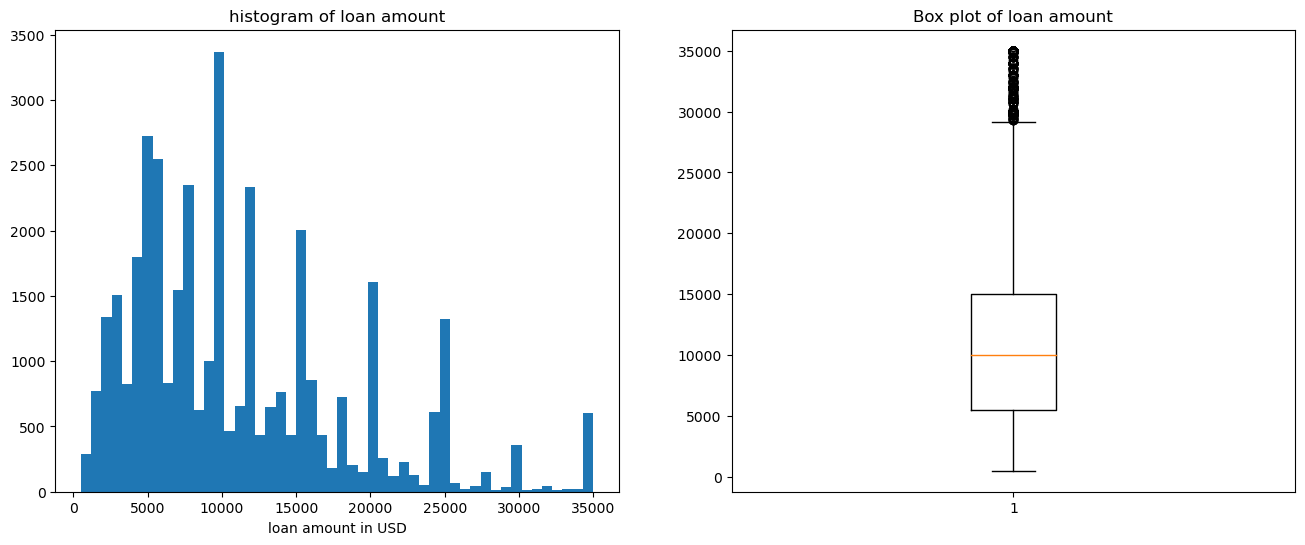

In [34]:
# Continoius field -  loan_amnt 
# Draw a subplot to fit histogram and box chart on loan_amnt
fig,ax = plt.subplots(nrows=1,ncols=2,sharex=False,sharey=False)
fig.set_size_inches(16,6)


ax[0].hist(loan['loan_amnt'],50)
ax[0].title.set_text('histogram of loan amount')
ax[0].set_xlabel('loan amount in USD')

ax[1].boxplot(loan['loan_amnt'])
ax[1].title.set_text('Box plot of loan amount')
plt.show()



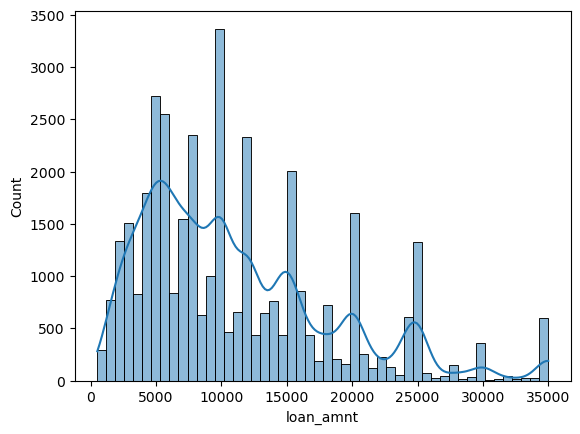

In [35]:
# Draw a seaborn histogram as well
sns.histplot(loan['loan_amnt'],kde=True,bins=50)
plt.show()

#### Analysis outcome<br>
---
##### From all the above visualizations what we can predict is there is no significant outliers for the continious field `loan_amnt`. Specially from the box plot we find that the higher fence is at around 30000 where as the max is around at 35000. This variation of data does not require outlier elimination.<br>


In [36]:
# Describe statistical data on int_rate
loan['int_rate'].describe()

count    37544.000000
mean        11.963319
std          3.683012
min          5.420000
25%          8.940000
50%         11.830000
75%         14.420000
max         24.400000
Name: int_rate, dtype: float64

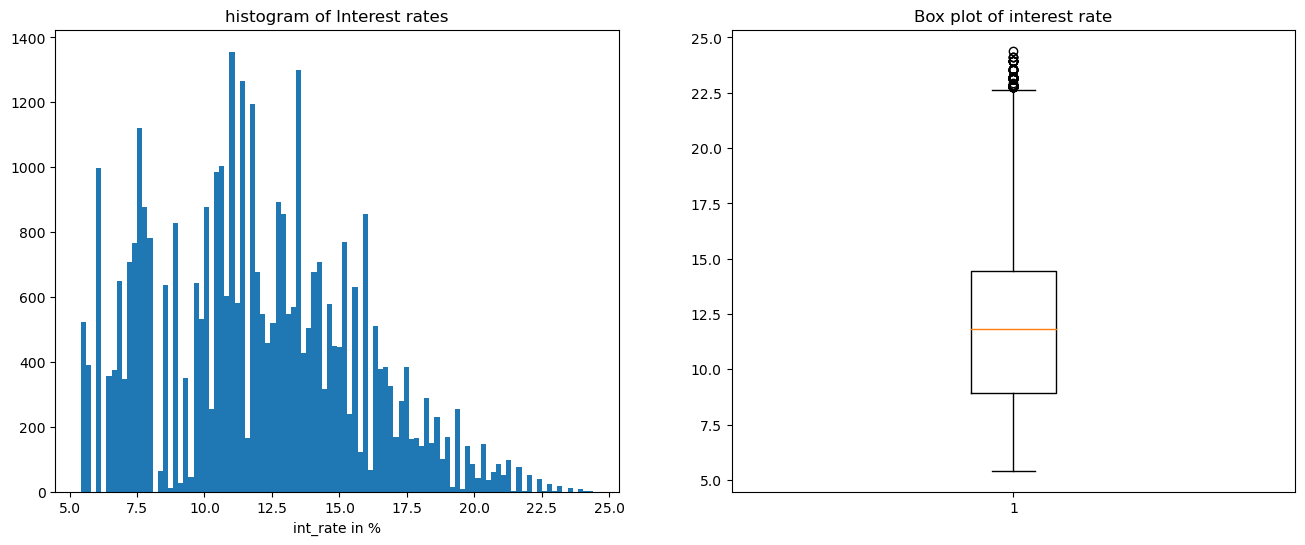

In [37]:
# Continious field int_rate
# Draw a subplot to fit histogram and box chart on int_rate

fig,ax = plt.subplots(nrows=1,ncols=2,sharex=False,sharey=False)
fig.set_size_inches(16,6)


ax[0].hist(loan['int_rate'],100)
ax[0].title.set_text('histogram of Interest rates')
ax[0].set_xlabel('int_rate in %')

ax[1].boxplot(loan['int_rate'])
ax[1].title.set_text('Box plot of interest rate')
plt.show()

#### Analysis outcome
---
##### From the above analysis our conclusion on the field `int_rate` is that the uppper fence value which is near to 22.5 and the max value which is near to 24. And thus this variation does not require any outliers treatment. We leave the data for this field as is for our analysis.Also we see the major distribution of interest rate is in between 10%-14%

In [38]:
# col emp_length - Statistical data description
loan['emp_length'].describe()

count    37544.000000
mean         5.061048
std          3.401750
min          1.000000
25%          2.000000
50%          4.000000
75%          9.000000
max         10.000000
Name: emp_length, dtype: float64

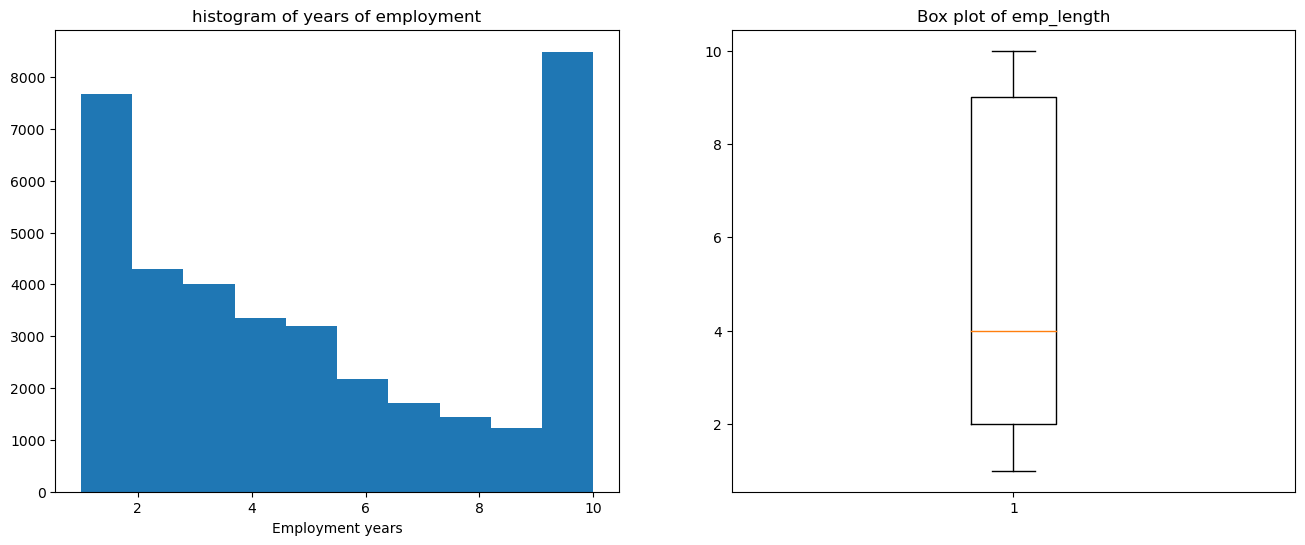

In [39]:
# Continious field emp_length
# Draw a subplot to fit histogram and box chart on emp_length

fig,ax = plt.subplots(nrows=1,ncols=2,sharex=False,sharey=False)
fig.set_size_inches(16,6)


ax[0].hist(loan['emp_length'],10)
ax[0].title.set_text('histogram of years of employment')
ax[0].set_xlabel('Employment years')

ax[1].boxplot(loan['emp_length'])
ax[1].title.set_text('Box plot of emp_length')
plt.show()

<Axes: xlabel='emp_length', ylabel='Count'>

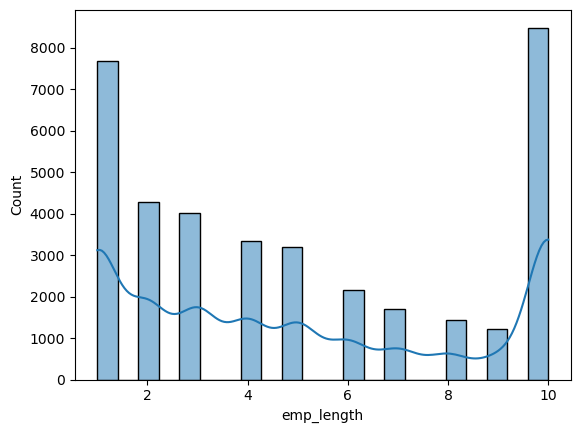

In [40]:
sns.histplot(loan['emp_length'],kde=True)

#### Analysis outcome<br>
---
##### From the above analysis our conclusion on the field `emp_length` is that there is no outliers (evident from the box plot) as all data within the upper fence. We leave the data for this field as is for our analysis.Also we see that most of the  applicant's employment tenure is either less than 2 Years or 10 years and more.

In [41]:
# col annual_inc - Statistical data description
loan['annual_inc'].describe()

count    3.754400e+04
mean     6.940708e+04
std      6.467698e+04
min      4.000000e+03
25%      4.100000e+04
50%      6.000000e+04
75%      8.300000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

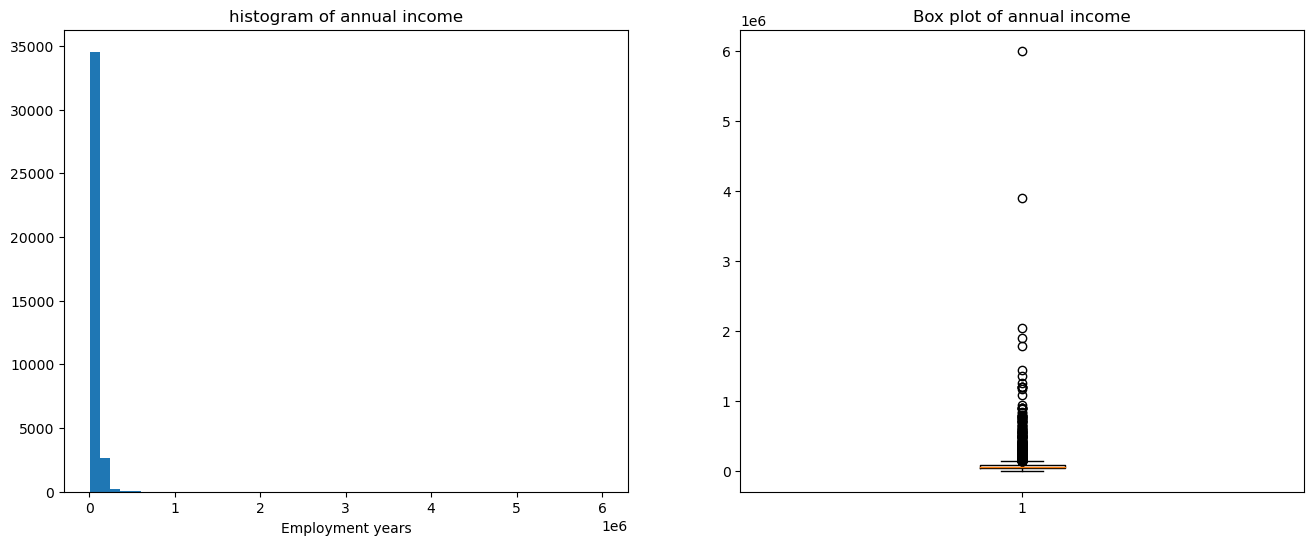

In [42]:
# Continious field annual_inc
# Draw a subplot to fit histogram and box chart on annual_inc

fig,ax = plt.subplots(nrows=1,ncols=2,sharex=False,sharey=False)
fig.set_size_inches(16,6)


ax[0].hist(loan['annual_inc'],50)
ax[0].title.set_text('histogram of annual income')


ax[1].boxplot(loan['annual_inc'])
ax[1].title.set_text('Box plot of annual income')
plt.show()

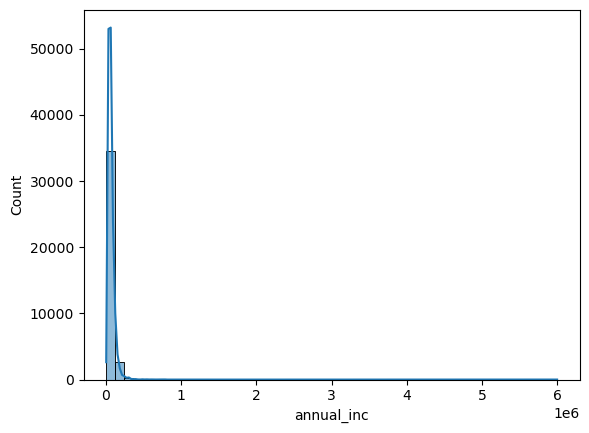

In [43]:
# Draw a seaborn histogram as well on annual_inc
sns.histplot(loan['annual_inc'],kde=True,bins=50)
plt.show()

#### Analysis outcome
---
##### From the above analysis we can clearly find significant outliers for the field `annual_inc`. We will remove the otliers by using IQR approach. It calculates the upper and lower limits based on the IQR, identifies outlier indices using Boolean arrays, and then removes the corresponding rows from the DataFrame, resulting in a new DataFrame with outliers excluded.The before and after shapes of the DataFrame are printed for comparison.


In [44]:
print(f'old shape :  {loan.shape}')

# IQR
# Calculate the upper and lower limits
Q1 = loan['annual_inc'].quantile(0.25)
Q3 = loan['annual_inc'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

# Create arrays of Boolean values indicating the outlier rows
upper_array = np.where(loan['annual_inc'] >= upper)[0]
lower_array = np.where(loan['annual_inc'] <= lower)[0]

# Removing the outliers
loan.drop(index=upper_array, inplace=True)
loan.drop(index=lower_array, inplace=True)

# Print the new shape of the DataFrame
print(f'New shape :  {loan.shape}')

old shape :  (37544, 37)
New shape :  (35805, 37)


##### Post removal of outliers lets draw the box plot again.This time it looks much better.

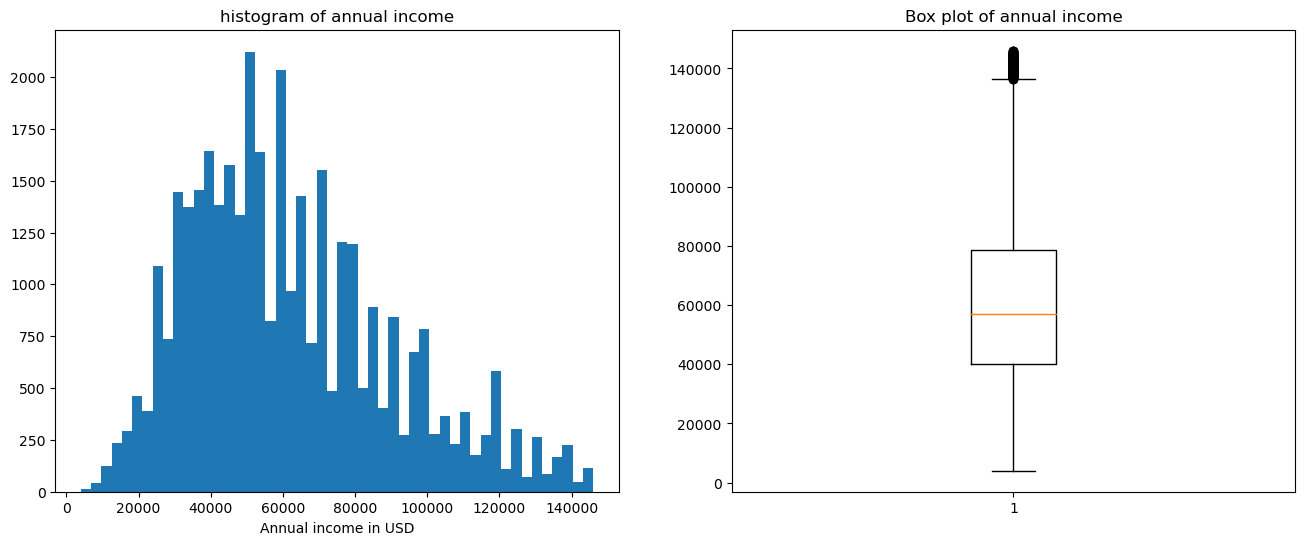

In [45]:
# Continious field annual_inc
# Draw a subplot to fit histogram and box chart on annual_inc

fig,ax = plt.subplots(nrows=1,ncols=2,sharex=False,sharey=False)
fig.set_size_inches(16,6)


ax[0].hist(loan['annual_inc'],50)
ax[0].title.set_text('histogram of annual income')
ax[0].set_xlabel('Annual income in USD')

ax[1].boxplot(loan['annual_inc'])
ax[1].title.set_text('Box plot of annual income')
plt.show()

In [46]:
# Describe statistical data on dti
loan['dti'].describe()

count    35805.000000
mean        13.450684
std          6.647518
min          0.000000
25%          8.370000
50%         13.580000
75%         18.700000
max         29.990000
Name: dti, dtype: float64

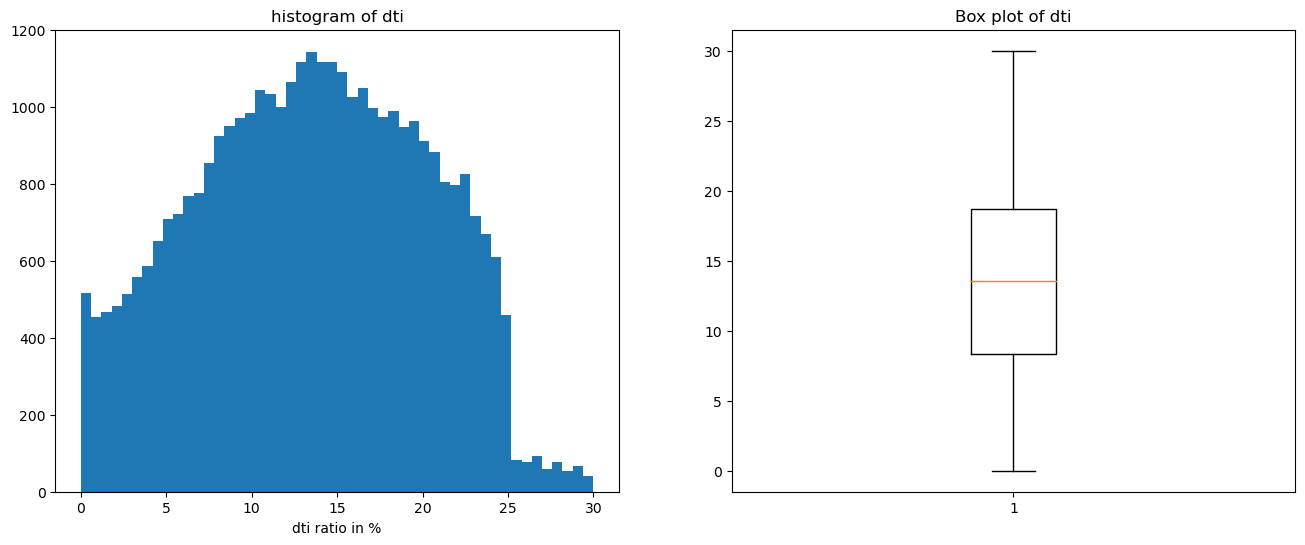

In [47]:
# Continious field dti
# Draw a subplot to fit histogram and box chart on dti

fig,ax = plt.subplots(nrows=1,ncols=2,sharex=False,sharey=False)
fig.set_size_inches(16,6)


ax[0].hist(loan['dti'],50)
ax[0].title.set_text('histogram of dti')
ax[0].set_xlabel('dti ratio in %')

ax[1].boxplot(loan['dti'])
ax[1].title.set_text('Box plot of dti')
plt.show()

#### Analysis outcome
---
##### Plot on `dti` looks pretty good, no otliers are found in the data set.

##### Start Analysis of `revol_bal` and `revol_util`. 
 revol_bal = Outstanding amount on a credit card or a revolving line of credit that has not been paid in full.
 revol_util = The revolving line utilization rate, also known as the credit utilization rate, is a measure of how much of your available revolving credit you are currently using. It is expressed as a percentage and is an important factor in determining your credit score

 Since these two fields are referring to the same business onject and that is revolving balance we would like to use one of them in our case study. We will use `revol_util` and will discard `revol_bal`

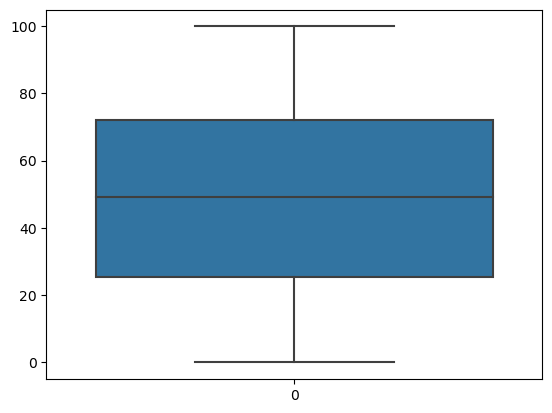

In [48]:
# drop col revol_bal
loan.drop(labels=['revol_bal'],axis=1,inplace=True)
# Draw a box plot on revol_util to check outliers
sns.boxplot(loan['revol_util'])
plt.show()

#### Analysis outcome
---
We see `revol_util` results a perfect boxplot and hence we keep thje data as is without any outlier treatment.

# Univariate Analysis - categorical variables
### Start Univariate Analysis for the categorical variables
>1. grade
>1. subgrade
>1. home_ownership
>1. verification_status
>1. Loan status
>1. purpose


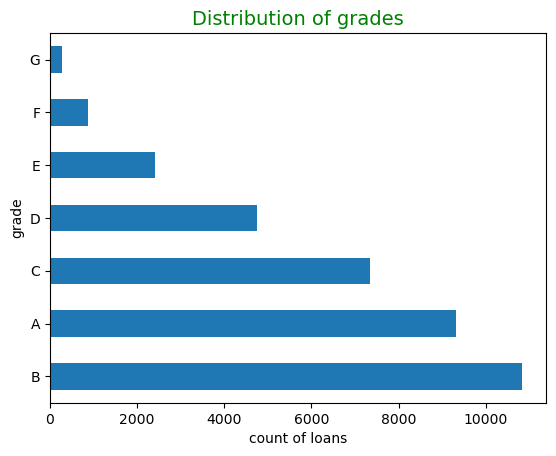

In [49]:
# Univariate analysis on categorical variable grade
loan['grade'].value_counts().plot.barh()
plt.xlabel('count of loans')
plt.title(label='Distribution of grades',fontdict={'color':'g','fontsize':'14'})
plt.show()

### Analysis outcome
---
##### Field `grade` A,B,C,D are quite dominant amongst all. Grade B counts more 10K , where as grade G is less than 500. We do not want to perform further univariate analysis on subgrade as that will not yeild much value.

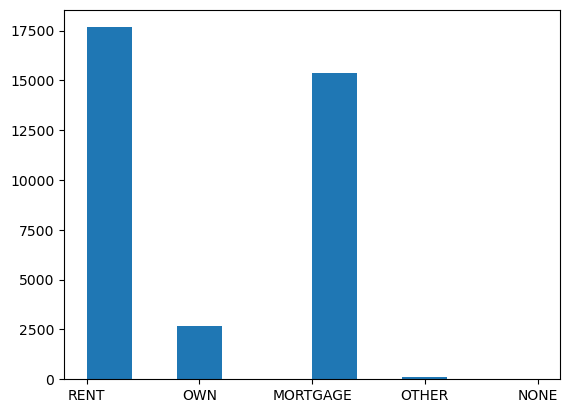

In [50]:
# Univariate analysis on categorical variable home_ownership
plt.style.use ='ggplot'
plt.hist(loan['home_ownership'])
plt.show()

### Analysis output
---
##### Most of the loan applicants house type is either Rent or Mortgage. A very small portion of the applicants have their own houses.

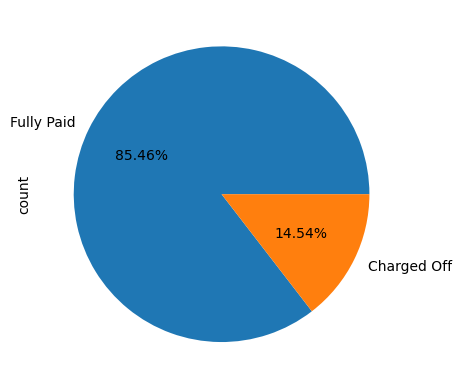

In [51]:
# Univariate Analysis - loan status
loan['loan_status'].value_counts().plot.pie(autopct='%1.2f%%')
plt.show()


### Analysis output<br>
#### We find that Fully paid loans are almost 7 times more than the loan of type charged off

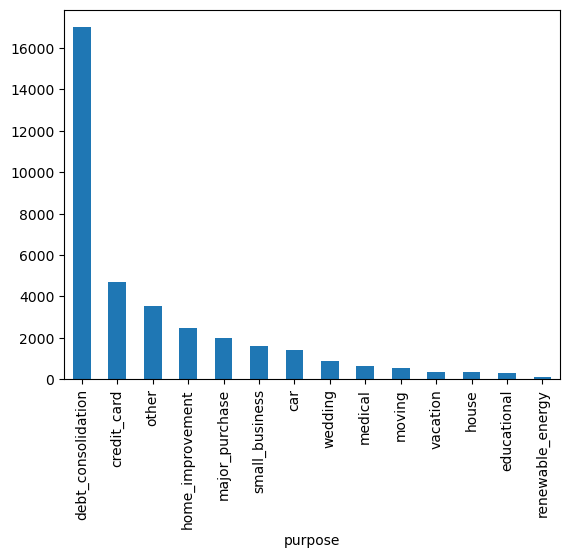

In [52]:
#Univariate analysis - column purpose
loan['purpose'].value_counts().plot.bar()
plt.show()

### Analysis Output
---
##### Debt consolidation is far more dominant than any other loan purpose.

### Bivariate Analysis - Here we will analyze the impact of other variables on the driving variable `loan_status`


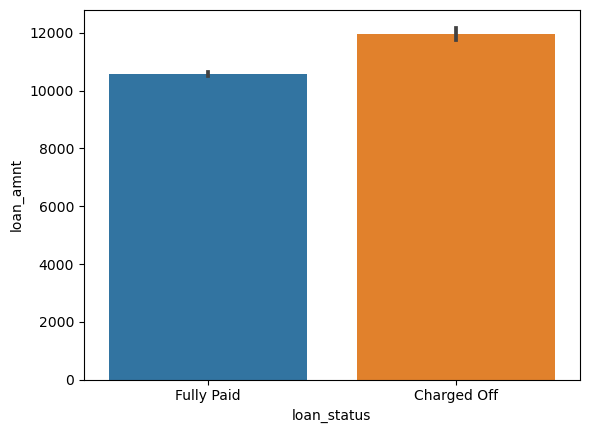

In [53]:
# Bivariate Analysis - loan_amnt and loan_status

sns.barplot(x=loan['loan_status'],y=loan['loan_amnt'])
plt.show()


#### Analysis output
---
##### This analysis shows that the loans those are charged off have higher average value than the fully paid ones. As a point of inference we would like to establish that for a lender investing higher amount may come out as more risky.


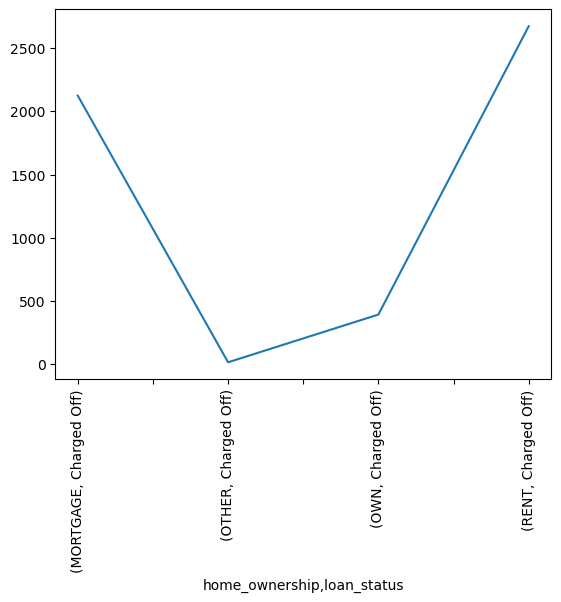

In [54]:
# Bivaiate Analysis - home_ownership and loan_status
# We would only like to focus on Charged Off part

loan[ loan.loan_status == 'Charged Off'].groupby(by=['home_ownership','loan_status'])['loan_status'].count().plot.line()
plt.xticks(rotation=90)
plt.show()

#### Analysis output
---
No significant outcome that we can notice out of the bove plot as we see Charged Off has no direct impact on the home ownership type. We see the spike at RENT and MORTGAGE and this is because the higher proportion of RENT and MORTGAGE which we have already estavlished earlier.

In [55]:
np.array(loan['annual_inc'].quantile([.2,.4,.6,.8,1]))

array([ 37000.,  50000.,  65000.,  85000., 145992.])

In [56]:
# Bivaiate Analysis - annual_inc and loan_status
# since income has so many data points it gets difficult to analyze annual income and loan status trend.
# We decide to break income into 5 bins and add a derived col as annual_inc_group

np.array(loan['annual_inc'].quantile([.2,.4,.6,.8,1]))


def createAnnualIncomeGroup(income):
    if income<= 37000:
        return '0-37K'
    if income<= 50000:
        return '37K-50K'
    if income<= 65000:
        return '50K-65K'
    if income<= 85000:
        return '65K-85K'
    else:
        return '85K+'


loan['annual_inc_group'] = loan['annual_inc'].apply(createAnnualIncomeGroup)

 


In [57]:
loan['annual_inc_group'].value_counts()

annual_inc_group
50K-65K    7551
37K-50K    7484
0-37K      7194
85K+       6796
65K-85K    6780
Name: count, dtype: int64

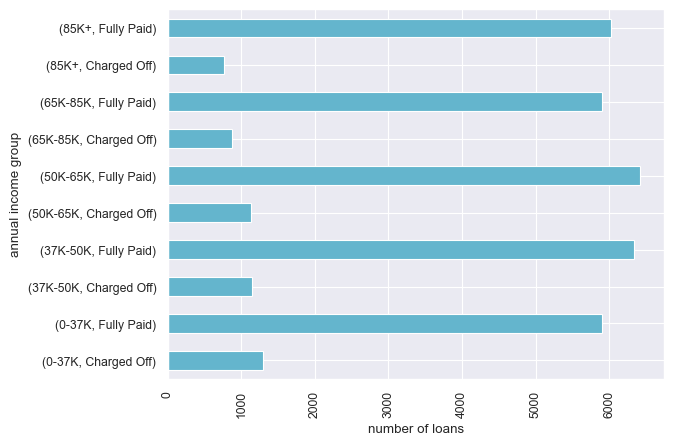

In [58]:
# Lets create a plot between annual income range and loans
sns.set_theme('paper')
loan.groupby(['annual_inc_group', 'loan_status']).loan_status.count().plot.barh(color='c')
plt.xticks(rotation=90)
plt.ylabel('annual income group')
plt.xlabel('number of loans')
plt.show()

#### Analysis output
---
##### We see with the increase of annual income the number of Chanrged Off loans are getting decreased. So a higher salary brings lesser credit risk for a lender.

In [59]:
# Bivariate Analysis - int_rate and loan_status
loan.int_rate.describe()
# Similar to Annual income we would like to create a derived categorical variable on Interest rate to restrict the wide variation into bins 
# The bins we will create 5-8,8-11,11-14,14-17,17+

def createInterestRateGroup(intRate):
    if intRate<= 8:
        return '5-8%'
    if intRate<= 11:
        return '8-11%'
    if intRate<= 14:
        return '11-14%'
    if intRate<= 17:
        return '14-17%'
    else:
        return '17%+'


loan['int_rate_group'] = loan['int_rate'].apply(createInterestRateGroup)
loan['int_rate_group'].value_counts().sort_values()


int_rate_group
17%+       3189
14-17%     6616
8-11%      7538
5-8%       7587
11-14%    10875
Name: count, dtype: int64

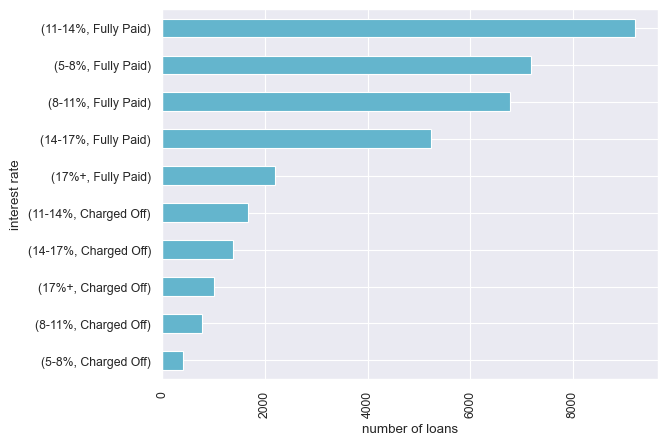

In [60]:
# Lets create a plot between interest rate and loan status
sns.set_theme('paper')
loan.groupby(['int_rate_group', 'loan_status']).loan_status.count().sort_values().plot.barh(color='c')
plt.xticks(rotation=90)
plt.ylabel('interest rate')
plt.xlabel('number of loans')
plt.show()


#### Analysis output
---
##### we find that Charged off loan count is getting increased with the interest rate and then reached pick at 11-14% category. We would like to double check if this trend has a corelation with the number of loans ( i.e as the number of loans are less at 14% and above may be the charged off loans are also less). We think that instead of absolute count is is better to figure out the ratio of charged off loans in each loan category.


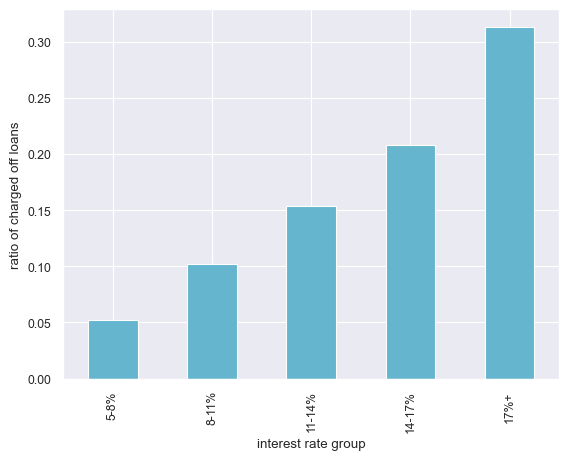

In [61]:
# We use unstack function to create a pivot table on int_rate_group
total = loan.groupby(by=['int_rate_group','loan_status'])['loan_status'].count().unstack()
total['Charged_Off_Ratio'] = total['Charged Off']/(total['Charged Off'] + total['Fully Paid'])
total.sort_values(by='Charged_Off_Ratio')['Charged_Off_Ratio'].plot.bar(color='c')
plt.xlabel('interest rate group')
plt.ylabel('ratio of charged off loans')
plt.show()

#### Analysis output
---
##### We get a clear indication that chances of loans getting charged off is very low if the interest rate is low(in rage 5-8%). It gets higher with the increase of interest rate and reaches the pick at 17% and more interest rate. So the higher the interest rate the higher is the credit risk.

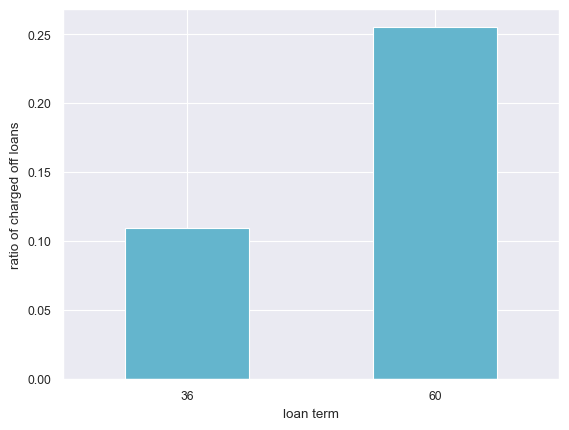

In [62]:
# Bivariate Analysis - term and loan_status
total = loan.groupby(by=['term','loan_status'])['loan_status'].count().unstack()
total['Charged_Off_Ratio'] = total['Charged Off']/(total['Charged Off'] + total['Fully Paid'])
total.sort_values(by='Charged_Off_Ratio')['Charged_Off_Ratio'].plot.bar(color='c')
plt.xlabel('loan term')
plt.ylabel('ratio of charged off loans')
plt.xticks(rotation =0)
plt.show()

#### Analysis outcome
---
The above plot reveals a very eminent trend that loan term 60 months are much more prone to get charged off than of the loan terms 36 months. For lenders, the higher the loan term the higher is the risk.

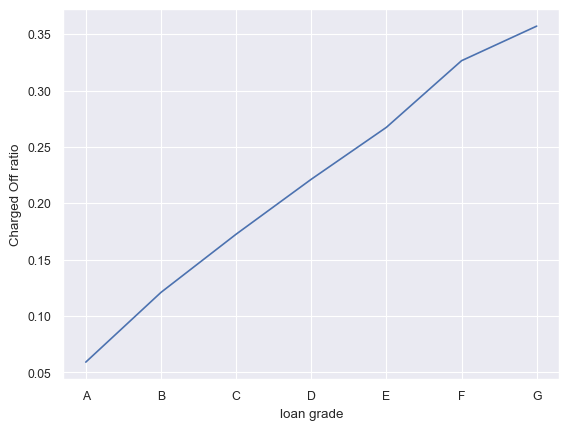

In [63]:
# Bivariate Analysis - grade and loan_status
total = loan.groupby(by=['grade','loan_status'])['loan_status'].count().sort_values().unstack()
total['Charged_Off_Ratio'] = total['Charged Off']/(total['Charged Off']+total['Fully Paid'])
total.sort_values(by='Charged_Off_Ratio')['Charged_Off_Ratio'].plot.line()
plt.xlabel('loan grade')
plt.ylabel('Charged Off ratio')
plt.show()


#### Analysis outcome
---
##### We find an almost linear line between loan grade and the charged off loans. As the loan grade increases the chances of a loan to be charged off increases. It also proves that higher grade loan bears much more credit risk for the lenders.

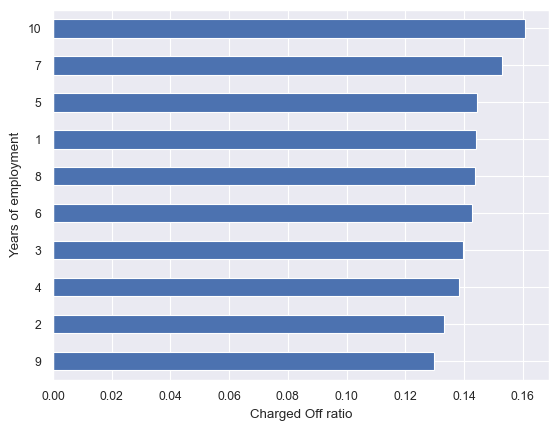

In [64]:
# Bivariate analysis - emp_length and loan_status
total = loan.groupby(by=['emp_length','loan_status'])['loan_status'].count().sort_values().unstack()
total['Charged_Off_Ratio'] = total['Charged Off'] / (total['Fully Paid'] + total['Charged Off'])
total.sort_values(by='Charged_Off_Ratio')['Charged_Off_Ratio'].plot.barh()
plt.ylabel('Years of employment')
plt.xlabel('Charged Off ratio')
plt.show()

#### Analysis outcome
---
##### We dont see any clear trend between the possibility of a loan gets charged off with the years of employment of the borrower. We see most loans are charged off when the employment years is 10 years or above, where as it is the least for 9 years and above. Also the variation is too small to infer any conclusion between these two variables.

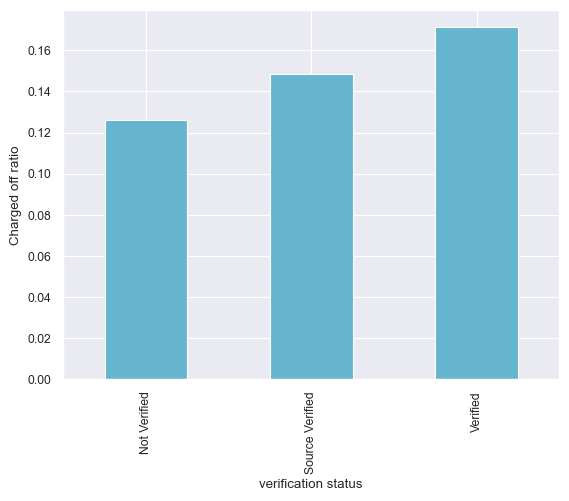

In [65]:
# Bivariate Analysis - verification_status and loan_status
total  = loan.groupby(by=['verification_status','loan_status'])['loan_status'].count().unstack()
total['Charged_Off_Ratio'] =  total['Charged Off'] /(total['Charged Off'] + total['Fully Paid'])
total.sort_values(by=['Charged_Off_Ratio'])['Charged_Off_Ratio'].plot.bar(color='c')
plt.xlabel('verification status')
plt.ylabel('Charged off ratio')
plt.show()

#### Analysis outcome
---
We see that verification status does not have much influence on Charged off loans.

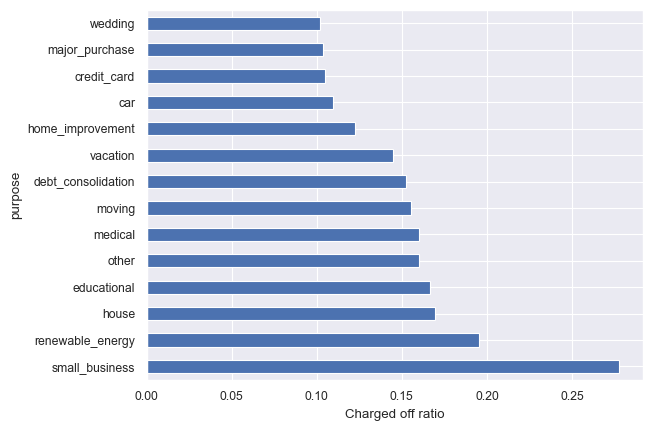

In [66]:
# Bivariate Analysis - loan_status and purpose
total = loan.groupby(['purpose', 'loan_status']).loan_status.count().unstack()
total['Total'] = total['Charged Off'] +  total['Fully Paid'] 
total['Charged_Off_Ratio'] = total['Charged Off'] / total['Total']
total.sort_values('Charged_Off_Ratio', ascending=False)['Charged_Off_Ratio'].plot.barh()
plt.xlabel('Charged off ratio')
plt.show()

#### Analysis outcome
##### We see that for small business the chance is highest that the loan may get charged off. And it is the lowest for loan taken for marriage.

In [ ]:
loan.info()

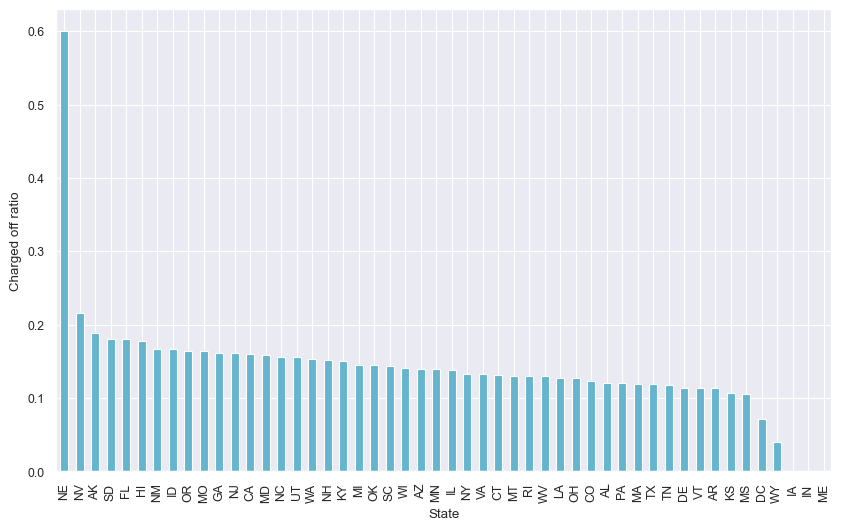

In [171]:
# Bivariate analtsis - addr_state and loan_status
plt.figure(figsize=[10,6])
total = loan.groupby(['addr_state', 'loan_status']).loan_status.count().unstack()
total['Total'] = total['Charged Off'] +  total['Fully Paid'] 
total['Charged_Off_Ratio'] = total['Charged Off'] / total['Total']
total.sort_values('Charged_Off_Ratio', ascending=False)['Charged_Off_Ratio'].plot.bar(color='c')
plt.xlabel('State')
plt.ylabel('Charged off ratio')
plt.xticks(rotation =90)
plt.show()


#### Analysis outcome
---
##### We see a significant high propotion of charged off loans in the state NY. Lender should be careful of this fact.

In [114]:
# Bivariate Anlsys - dti and loan_status
# Now since dti is continious variable we would like to create few groups on dti and then perform analysis.
# We will create the bins as per the quantile range
loan.dti.quantile([.2,.4,.6,.8,1])

def createDTIGroup(dtival):
    if dtival<=7.15:
        return '0-7.15%'
    elif dtival<=11.61:
        return '7.15-11.61%'
    elif dtival<=15.51:
        return '11.61-15.51%'
    elif dtival<= 19.83:
        return '15.51-19.83%'
    else:
        return '19.83% +'


loan['dti_group'] = loan.dti.apply(createDTIGroup)
loan['dti_group'].head()

0       19.83% +
1        0-7.15%
2    7.15-11.61%
3       19.83% +
4    7.15-11.61%
Name: dti_group, dtype: object

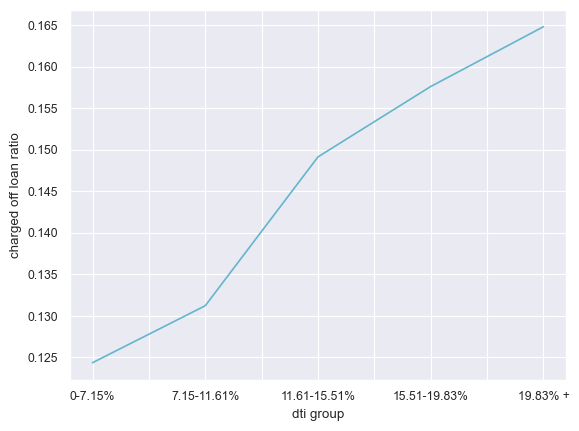

In [172]:
total = loan.groupby(['dti_group','loan_status'])['loan_status'].count().unstack()
total['Charged_Off_Ratio'] = total['Charged Off'] /(total['Fully Paid'] + total['Charged Off'])
total['Charged_Off_Ratio'].sort_values().plot.line(color='c') 
plt.xlabel('dti group')
plt.ylabel('charged off loan ratio')
plt.show()

#### Analysis outcome
---
##### We see a clear trend here that with the increase of dti possibility of loans getting charged off are increasing. The jump in this increase is highest between `7.15-11.61%` and `11.61-15.51%`. Its quite obvious for lenders that a higher dti of an borrower brings greater risk of a loan being charged off.

In [125]:
# Bivariate analysis - revol_util and loan_status
# As per our practive we will create a categorical variable as revol_util_group to categorize the continious variable revol_util into 6 bins

loan.revol_util.describe()
loan.revol_util.quantile([.2,.4,.6,.8,1])

def createRevolUtilGroup(revolUtilVal):
    if revolUtilVal<=20:
        return '0-20%'
    if revolUtilVal<=40:
        return '20-40%'
    if revolUtilVal<=60:
        return '40-60%'
    if revolUtilVal<=80:
        return '60-80%'
    else:
        return '80% +'

loan['revol_util_group'] = loan.revol_util.apply(createRevolUtilGroup)
loan['revol_util_group'].head()

0     80% +
1     0-20%
2     80% +
3    20-40%
4    20-40%
Name: revol_util_group, dtype: object

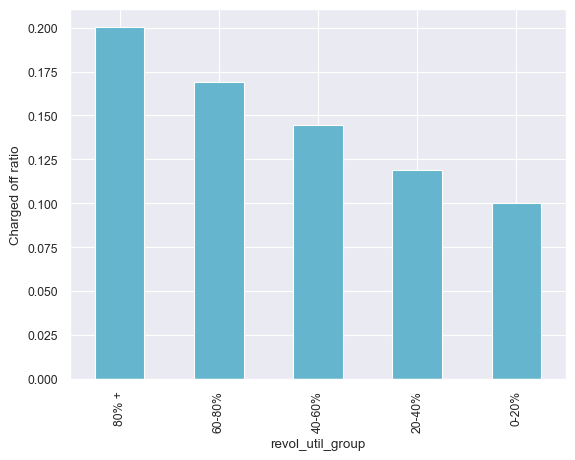

In [184]:
total = loan.groupby(['revol_util_group', 'loan_status']).loan_status.count().unstack()
total['Total'] = total['Charged Off'] +  total['Fully Paid'] 
total['Charged_Off_Ratio'] = total['Charged Off'] / total['Total']
total.sort_values('Charged_Off_Ratio', ascending=False)['Charged_Off_Ratio'].plot.bar(color='c')
plt.xlabel('revol_util_group')
plt.ylabel('Charged off ratio')
plt.xticks(rotation =90)
plt.show()


#### Analysis outcome
---
##### The observation is with the higher revolving utilization ratio posibilities of a loan gets charged off increases. 

In [ ]:
# At this point we would like to double check the columns and if needed can take necessary actions on columns
loan.info()
# We find few columns are there which are more important for the loan_status = Current. These fields are not important for our purpose.
# These fields are


##### We find few columns are more important for the loan_status = Current. These fields are not so important for our purpose. These are
>1. out_prncp
>1. out_prncp_inv 
>1. total_pymnt
>1. total_pymnt_inv 
>1. total_rec_prncp
>1. total_rec_int 
#### Few columns are only valid for a loan which is already Charged Off. we can get rid of them too
>1. recoveries
>1. collection_recovery_fee 
>1. last_pymnt_d 
>1. last_pymnt_amnt
>1. last_credit_pull_d 
>1. total_rec_late_fee   

In [ ]:
# We will drop all those columns listed above
colsToDrop = ['out_prncp',
              'out_prncp_inv',
              'total_pymnt',
              'total_pymnt_inv',
              'total_rec_prncp',
              'total_rec_int',
              'recoveries',
              'collection_recovery_fee',
              'last_pymnt_d',
              'last_pymnt_amnt',
              'last_credit_pull_d',
              'total_rec_late_fee'
              ]
loan.drop(colsToDrop,axis=1,inplace=True)
loan.info()

In [ ]:
loan.info()

In [155]:
# Bivariate analysis - issue_d and issuance of loan
# Create a derived col for issue_d year
loan['issue_year'] = pd.DatetimeIndex(loan.issue_d).year
loan['issue_year'].value_counts()

issue_year
2011    18834
2010    10746
2009     4499
2008     1495
2007      231
Name: count, dtype: int64

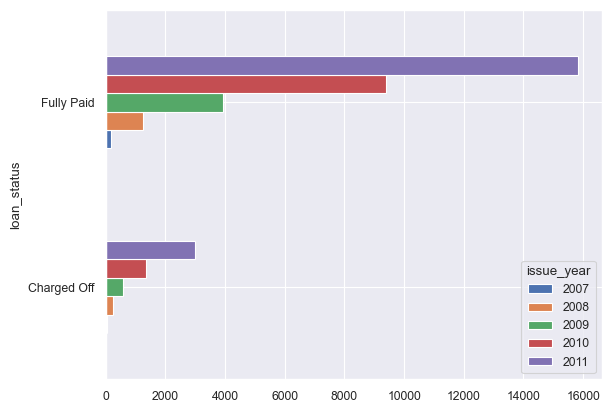

In [195]:
# Now lets check how loans got charged off year by year basis
total = loan.groupby(['loan_status','issue_year'])['loan_status'].count().sort_values().unstack().plot.barh()
plt.show()



#### Analysis outcome
---
##### we see that yearly basis there is increase in issueance of loan.

In [215]:
# Bivariate Analysis - loan_status and delinq_2yrs

total =loan.groupby(['delinq_2yrs','loan_status'])['loan_status'].count().unstack()
total

# We dont find any strong evidence between the connection of loan_status and delinq_2yrs


loan_status,Charged Off,Fully Paid
delinq_2yrs,,
0,4573.0,27360.0
1,473.0,2508.0
2,112.0,488.0
3,31.0,166.0
4,13.0,44.0
5,2.0,17.0
6,1.0,9.0
7,1.0,3.0
8,1.0,1.0


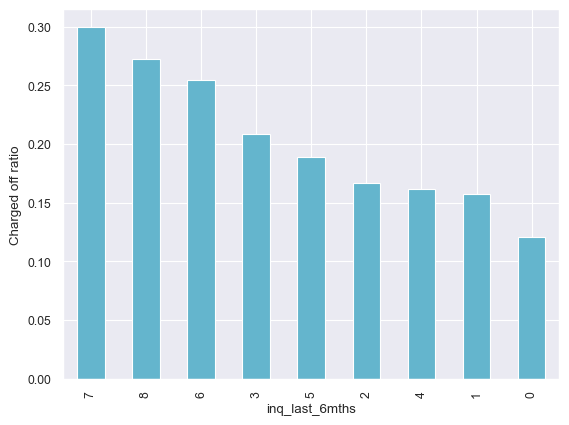

In [219]:
# Bi variate analysis - inq_last_6mths and loan_status
total =loan.groupby(['inq_last_6mths','loan_status'])['loan_status'].count().unstack()
total['total'] = total['Charged Off'] + total['Fully Paid']
total['Charged_Off_Ratio'] = total['Charged Off'] / total['total']
total.sort_values('Charged_Off_Ratio', ascending=False)['Charged_Off_Ratio'].plot.bar(color='c')
plt.xlabel('inq_last_6mths')
plt.ylabel('Charged off ratio')
plt.xticks(rotation =90)
plt.show()

#### Analysis outcome
---
##### We see the trend that with higher number of credit inquiries charged off ratio is also getting increased.

In [224]:
# Bivariate Analysis - open_acc and loan_status
# First create a categorical col as open_acc_group for the continious variable open_acc

def createOpenAccGroup(openAccCnt):
    if openAccCnt<=6:
        return '0-6'
    if openAccCnt<=8:
        return '6-8'
    if openAccCnt<=12:
        return '8-12'
    if openAccCnt<=20:
        return '12-20'
    else:
        return '20+'

loan['open_acc_group'] = loan.open_acc.apply(createOpenAccGroup)

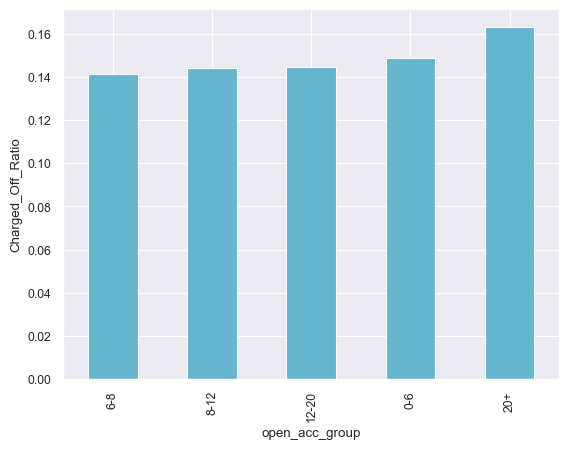

In [229]:
total =  loan.groupby(['open_acc_group','loan_status'])['loan_status'].count().sort_values().unstack()
total['total'] = total['Charged Off'] + total['Fully Paid']
total['Charged_Off_Ratio'] = total['Charged Off'] /(total['total'] )
total['Charged_Off_Ratio'].sort_values().plot.bar(color='c')
plt.xlabel('open_acc_group')
plt.ylabel('Charged_Off_Ratio')
plt.show()

#### Analysis outcome
---
##### We dont see any strong relationship between `open_acc` and charged off ratio.

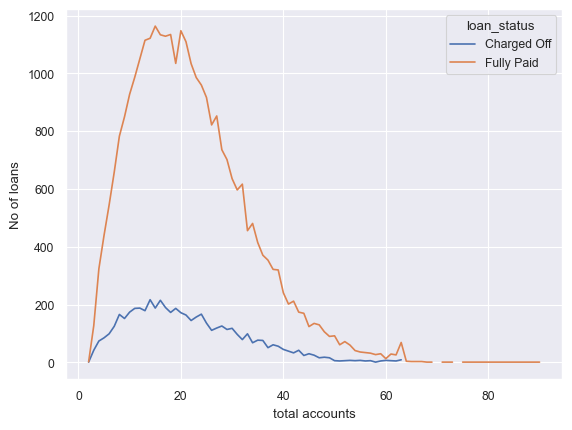

In [253]:
#Bivariate Analysis - total_acc and loan_status
loan.groupby(['total_acc','loan_status']).loan_status.count().unstack().plot.line()
plt.xlabel('total accounts')
plt.ylabel('No of loans')
plt.show()

#### Analysis output
---
##### We see that when total accounts are increasing number of charged off loans are decreasing.

#### We can still drop few columns which we have not cleaned up yet
>-  id ( This is a transaction is and thus have no influence on the data set)
>-   sub_grade (We have already analyzed the impact of `grade` on the driver variable. Sub grade analysis at this moment does not seem to be fruitful)
>-   zip_code ( we have analyzed the impact of `addr_state`, zip_code wise analysis may not yeild details as theere are too less records for each zip)

In [254]:
colsToDrop= ['id','sub_grade','zip_code']
loan.drop(colsToDrop,axis=1,inplace=True)

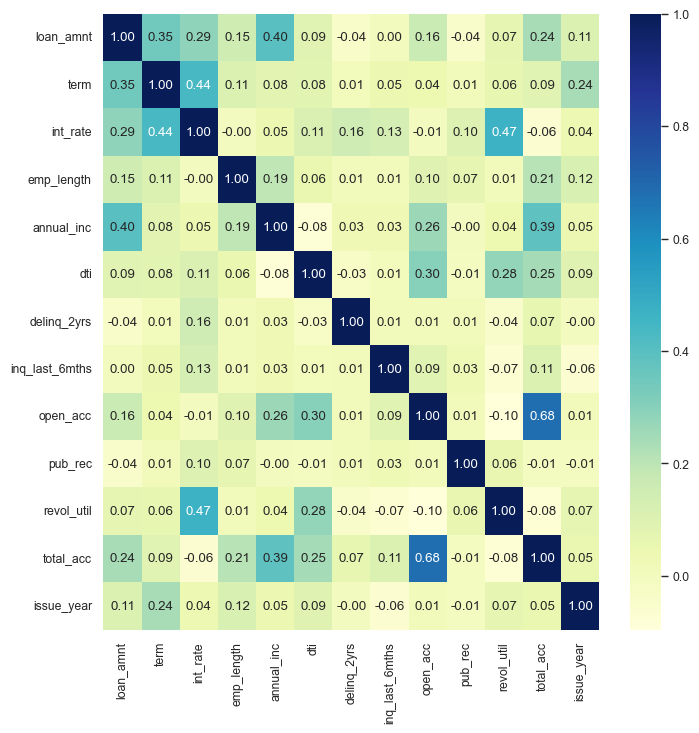

In [268]:
# Lets create a co relation heat map between all the relevant numeric fields
loan_numeric = loan.select_dtypes(include=np.number)
loan_numeric.drop(['member_id'],axis=True,inplace=True)
f = plt.figure(figsize=(8,8))
sns.heatmap(loan_numeric.corr(), annot=True, cmap="YlGnBu", fmt='.2f')
plt.show()


#### Anlysis outcome
---
##### Observation of potivie co relation
>-  `tota_acc` and `open_acc` 
>-  `annual_inc` and `loan_amnt` 
>-  `revol_util` and `int_rate`
>- `term` and `loan_amnt`
>-  `int_rate` and `term`

##### Observation of negative co relation
>-  `open_acc`and  `revol_util`



